In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged_dataset.csv')
print(df.head(5))

<ipython-input-3-4d8cd5039713>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged_dataset.csv')


      X     Y     Z       EDA     HR   TEMP  id  \
0 -13.0 -61.0   5.0  6.769995  99.43  31.17  15   
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17  15   
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17  15   
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17  15   
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17  15   

                        datetime  label  
0  2020-07-08 14:03:00.000000000    2.0  
1  2020-07-08 14:03:00.031249920    2.0  
2  2020-07-08 14:03:00.062500096    2.0  
3  2020-07-08 14:03:00.093750016    2.0  
4  2020-07-08 14:03:00.124999936    2.0  


In [ ]:
df.shape

(11509051, 9)

In [ ]:
df.isna().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


#Data Cleaning

detect_outliers

In [ ]:
import numpy as np

def detect_outliers_z_score(data):
    outliers_indices = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i, value in enumerate(data):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers_indices.append(i)
    return outliers_indices

# List to store outlier counts for each column
outlier_counts_all = {}

# Iterate over each numerical column in the dataframe
for column in df.select_dtypes(include=['float64']).columns:
    # Apply outlier detection to the column
    outlier_indices = detect_outliers_z_score(df[column])
    # Count the number of outliers for the column
    outlier_counts_all[column] = len(outlier_indices)

# Print summary of outlier counts for each column
for column, count in outlier_counts_all.items():
    print("Number of outliers in column '{}': {}".format(column, count))


Number of outliers in column 'X': 47258
Number of outliers in column 'Y': 20554
Number of outliers in column 'Z': 79819
Number of outliers in column 'EDA': 259978
Number of outliers in column 'HR': 118658
Number of outliers in column 'TEMP': 4480
Number of outliers in column 'label': 0


In [ ]:
# Create a copy of the DataFrame
df_cleaned = df.copy()

# Reset index to ensure alignment with outlier indices
df_cleaned.reset_index(drop=True, inplace=True)

# Iterate over each numerical column in the DataFrame
for column in df.select_dtypes(include=['float64']).columns:
    # Apply outlier detection to the column
    outlier_indices = detect_outliers_z_score(df[column])
    # Filter outlier indices within the range of DataFrame indices
    outlier_indices = [index for index in outlier_indices if index < len(df_cleaned)]
    # Remove rows with outlier indices
    df_cleaned = df_cleaned.drop(df_cleaned.index[outlier_indices])

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df_cleaned.shape)


Shape of cleaned DataFrame: (10979929, 9)


ID cleaning(There should have 15 id but we have 18)

In [ ]:
# Check the number of unique values for each column in df_cleaned
unique_values = df_cleaned.nunique()

# Print the number of unique values for each column
print(unique_values)


X                189
Y                256
Z                256
EDA           260709
HR              6266
TEMP             598
id                18
datetime    10156161
label              3
dtype: int64


In [ ]:
# Check for leading or trailing white spaces and remove them
df_cleaned['id'] = df_cleaned['id'].str.strip()

# Convert the 'ID' column to uppercase or lowercase
df_cleaned['id'] = df_cleaned['id'].str.upper()  # or df['ID'] = df['ID'].str.lower()

# Check for unique values after cleaning
unique_ids = df_cleaned['id'].unique()
print(len(unique_ids), "unique IDs after cleaning:", unique_ids)


16 unique IDs after cleaning: [nan '15' '5C' '6B' '6D' '7A' '7E' '83' '8B' '94' 'BG' 'CE' 'DF' 'E4' 'EG'
 'F5']


In [ ]:
# Check for missing values in the 'ID' column
missing_ids = df_cleaned[df_cleaned['id'].isna()]
print("Number of rows with missing IDs:", len(missing_ids))


Number of rows with missing IDs: 2014448


In [ ]:
# Drop rows with missing IDs
df_cleaned = df_cleaned.dropna(subset=['id'])

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of cleaned DataFrame: (8965481, 9)


In [ ]:
# Remove rows with missing IDs
df_cleaned = df_cleaned.dropna(subset=['id'])

# Check for leading or trailing white spaces and remove them
df_cleaned['id'] = df_cleaned['id'].str.strip()

# Convert the 'ID' column to uppercase or lowercase
df_cleaned['id'] = df_cleaned['id'].str.upper()  # or df['ID'] = df['ID'].str.lower()

# Check for unique values after cleaning
unique_ids = df_cleaned['id'].unique()
print(len(unique_ids), "unique IDs after cleaning:", unique_ids)


15 unique IDs after cleaning: ['15' '5C' '6B' '6D' '7A' '7E' '83' '8B' '94' 'BG' 'CE' 'DF' 'E4' 'EG'
 'F5']


In [ ]:
df_cleaned

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
262144,-42.0,-6.0,59.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.781250048,2.0
262145,-46.0,-9.0,58.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.812499968,2.0
262146,-45.0,-12.0,58.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.843749888,2.0
262147,-41.0,-10.0,50.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.875000064,2.0
262148,-43.0,-8.0,43.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.906249984,2.0
...,...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.968750080,2.0


#Data Visualization

In [ ]:
df_cleaned

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
262144,-42.0,-6.0,59.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.781250048,2.0
262145,-46.0,-9.0,58.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.812499968,2.0
262146,-45.0,-12.0,58.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.843749888,2.0
262147,-41.0,-10.0,50.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.875000064,2.0
262148,-43.0,-8.0,43.0,9.957165,96.60,32.37,15,2020-07-24 13:22:31.906249984,2.0
...,...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.968750080,2.0


In [ ]:
# Calculate the average of columns X, Y, and Z
df_cleaned['ACC'] = (df_cleaned['X'] + df_cleaned['Y'] + df_cleaned['Z']) / 3

# Create a new DataFrame by dropping columns X, Y, and Z from the existing DataFrame df
df_cleaned_ACC = df_cleaned.drop(columns=['X', 'Y', 'Z'])

# Print the new DataFrame
print(df_cleaned_ACC)

               EDA     HR   TEMP  id                       datetime  label  \
262144    9.957165  96.60  32.37  15  2020-07-24 13:22:31.781250048    2.0   
262145    9.957165  96.60  32.37  15  2020-07-24 13:22:31.812499968    2.0   
262146    9.957165  96.60  32.37  15  2020-07-24 13:22:31.843749888    2.0   
262147    9.957165  96.60  32.37  15  2020-07-24 13:22:31.875000064    2.0   
262148    9.957165  96.60  32.37  15  2020-07-24 13:22:31.906249984    2.0   
...            ...    ...    ...  ..                            ...    ...   
11509046  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.875000064    2.0   
11509047  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.906249984    2.0   
11509048  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.937499904    2.0   
11509049  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.968750080    2.0   
11509050  3.374543  88.33  33.75  F5  2020-07-23 17:29:00.000000000    2.0   

                ACC  
262144     3.666667  
262145     1.000000

<ipython-input-17-03c4d65ef9aa>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_cleaned_ACC.groupby('label').mean()


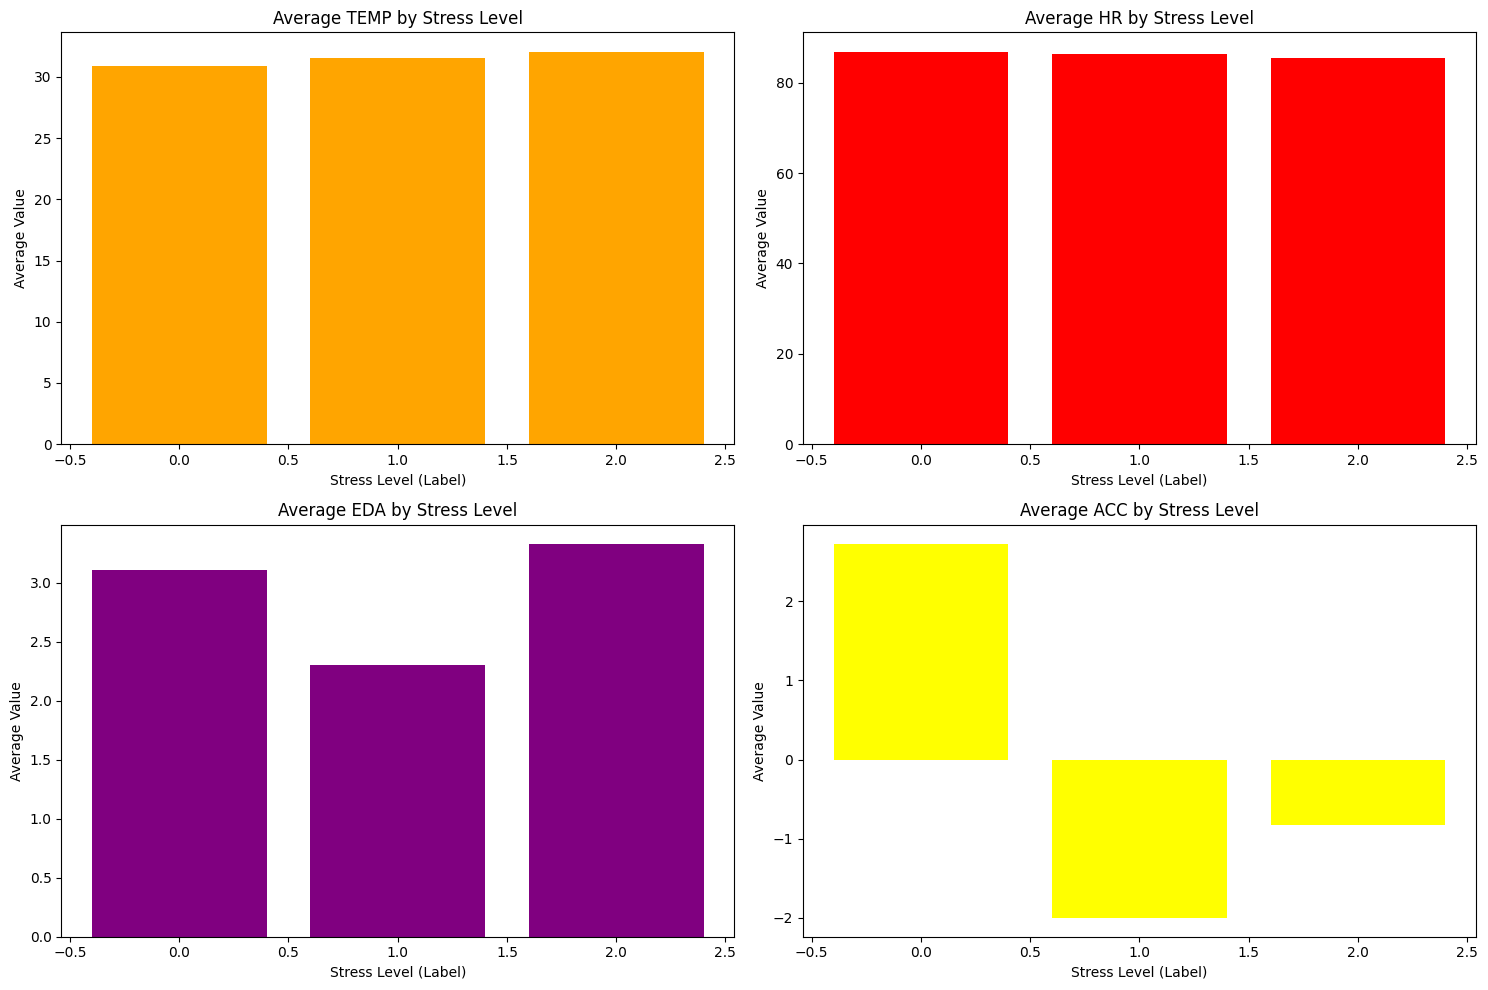

In [ ]:
import matplotlib.pyplot as plt

# Group by 'label' and calculate the average values for each feature
grouped_data = df_cleaned_ACC.groupby('label').mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot each feature in a separate subplot
features = ['TEMP', 'HR', 'EDA', 'ACC']
colors = ['orange', 'red', 'purple', 'yellow']

for i, ax in enumerate(axes.flat):
    if i < len(features):  # Check if index is within the range of features
        feature = features[i]
        color = colors[i]
        ax.bar(grouped_data.index, grouped_data[feature], color=color)
        ax.set_title(f'Average {feature} by Stress Level')
        ax.set_xlabel('Stress Level (Label)')
        ax.set_ylabel('Average Value')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Group by 'label' and calculate the average values for each feature
grouped_data = df_cleaned_ACC.groupby('label').mean()

# Display the grouped data in a table format
print("Average Sensor Readings by Stress Level:")
print(grouped_data)


Average Sensor Readings by Stress Level:
            EDA         HR       TEMP       ACC
label                                          
0.0    3.110010  86.781434  30.901649  2.730095
1.0    2.303219  86.250717  31.523047 -2.002374
2.0    3.326602  85.438311  32.027571 -0.825207


<ipython-input-18-a530bcf58815>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_cleaned_ACC.groupby('label').mean()


In [ ]:
# Specify the file path where you want to save the CSV file
csv_file_path = "df_cleaned_ACC.csv"

# Save the DataFrame to a CSV file
df_cleaned_ACC.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to df_cleaned_ACC.csv


Dataset is ready for Correlation Analysis in Jupyter Notebook

#Statistical Model

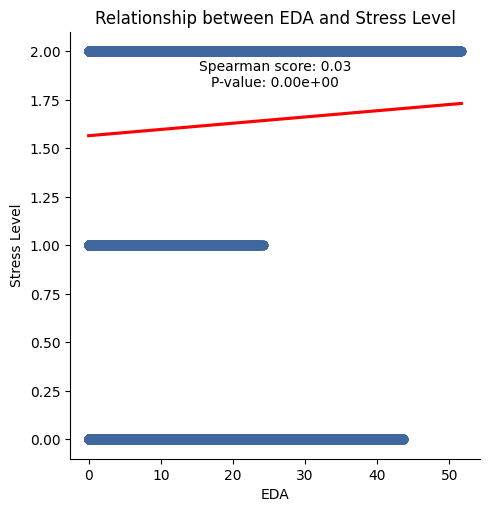

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Define the color code
data_point_color = '#40679E'

# Check if 'TEMP' data is normally distributed
if np.abs(df_cleaned_ACC['EDA'].skew()) < 1:
    # Data is normally distributed
    correlation_coefficient, p_value = pearsonr(df_cleaned_ACC['label'], df_cleaned_ACC['EDA'])
    correlation_type = "Pearson"
else:
    # Data is not normally distributed
    correlation_coefficient, p_value = spearmanr(df_cleaned_ACC['label'], df_cleaned_ACC['EDA'])
    correlation_type = "Spearman"

# Create scatter plot with regression line and specified color for data points
sns.lmplot(x='EDA', y='label', data=df_cleaned_ACC, line_kws={'color': 'red'}, scatter_kws={'color': data_point_color})

# Annotate plot with correlation coefficient and p-value
plt.text(0.5, 0.9, f"{correlation_type} score: {correlation_coefficient:.2f}\nP-value: {p_value:.2e}",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Set Y-axis label
plt.ylabel('Stress Level')

# Set plot title
plt.title(f'Relationship between EDA and Stress Level')

# Save the figure
plt.savefig('EDA_vs_StressLevel.png')

# Show plot
plt.show()


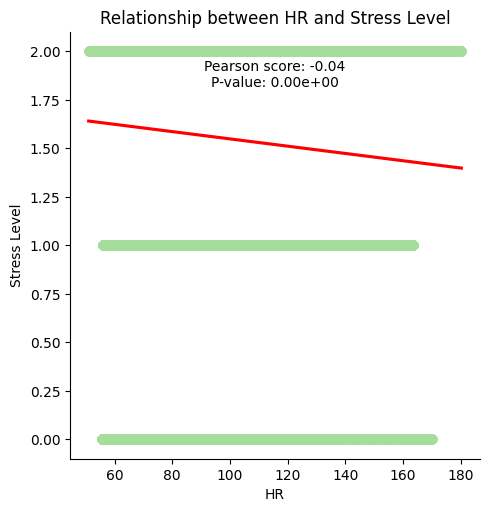

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Define the color code
data_point_color = '#A5DD9B'

# Check if 'TEMP' data is normally distributed
if np.abs(df_cleaned_ACC['HR'].skew()) < 1:
    # Data is normally distributed
    correlation_coefficient, p_value = pearsonr(df_cleaned_ACC['label'], df_cleaned_ACC['HR'])
    correlation_type = "Pearson"
else:
    # Data is not normally distributed
    correlation_coefficient, p_value = spearmanr(df_cleaned_ACC['label'], df_cleaned_ACC['HR'])
    correlation_type = "Spearman"

# Create scatter plot with regression line and specified color for data points
sns.lmplot(x='HR', y='label', data=df_cleaned_ACC, line_kws={'color': 'red'}, scatter_kws={'color': data_point_color})

# Annotate plot with correlation coefficient and p-value
plt.text(0.5, 0.9, f"{correlation_type} score: {correlation_coefficient:.2f}\nP-value: {p_value:.2e}",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Set Y-axis label
plt.ylabel('Stress Level')

# Set plot title
plt.title(f'Relationship between HR and Stress Level')

# Save the figure
plt.savefig('HR_vs_StressLevel.png')

# Show plot
plt.show()


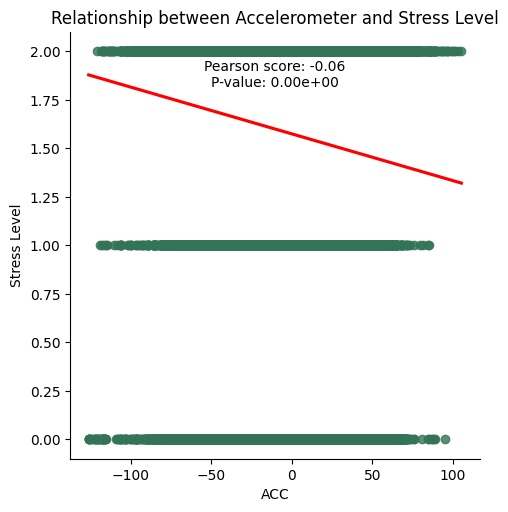

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Define the color code
data_point_color = '#337357'

# Check if 'TEMP' data is normally distributed
if np.abs(df_cleaned_ACC['ACC'].skew()) < 1:
    # Data is normally distributed
    correlation_coefficient, p_value = pearsonr(df_cleaned_ACC['label'], df_cleaned_ACC['ACC'])
    correlation_type = "Pearson"
else:
    # Data is not normally distributed
    correlation_coefficient, p_value = spearmanr(df_cleaned_ACC['label'], df_cleaned_ACC['ACC'])
    correlation_type = "Spearman"

# Create scatter plot with regression line and specified color for data points
sns.lmplot(x='ACC', y='label', data=df_cleaned_ACC, line_kws={'color': 'red'}, scatter_kws={'color': data_point_color})

# Annotate plot with correlation coefficient and p-value
plt.text(0.5, 0.9, f"{correlation_type} score: {correlation_coefficient:.2f}\nP-value: {p_value:.2e}",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Set Y-axis label
plt.ylabel('Stress Level')

# Set plot title
plt.title(f'Relationship between Accelerometer and Stress Level')

# Save the figure
plt.savefig('accelerometer_vs_StressLevel.png')

# Show plot
plt.show()


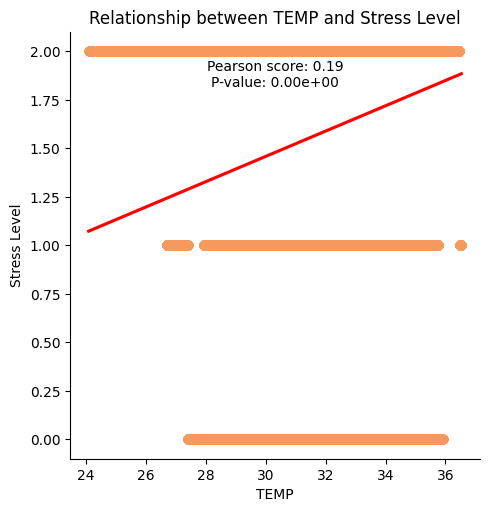

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Define the color code
data_point_color = '#F6995C'

# Check if 'TEMP' data is normally distributed
if np.abs(df_cleaned_ACC['TEMP'].skew()) < 1:
    # Data is normally distributed
    correlation_coefficient, p_value = pearsonr(df_cleaned_ACC['label'], df_cleaned_ACC['TEMP'])
    correlation_type = "Pearson"
else:
    # Data is not normally distributed
    correlation_coefficient, p_value = spearmanr(df_cleaned_ACC['label'], df_cleaned_ACC['TEMP'])
    correlation_type = "Spearman"

# Create scatter plot with regression line and specified color for data points
sns.lmplot(x='TEMP', y='label', data=df_cleaned_ACC, line_kws={'color': 'red'}, scatter_kws={'color': data_point_color})

# Annotate plot with correlation coefficient and p-value
plt.text(0.5, 0.9, f"{correlation_type} score: {correlation_coefficient:.2f}\nP-value: {p_value:.2e}",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Set Y-axis label
plt.ylabel('Stress Level')

# Set plot title
plt.title(f'Relationship between TEMP and Stress Level')

# Save the figure
plt.savefig('TEMP_vs_StressLevel.png')

# Show plot
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Create two groups based on stress level: high stress (2) and low stress (0)
high_stress_group = df_cleaned_ACC[df_cleaned_ACC['label'] == 2][['EDA', 'HR', 'TEMP', 'ACC']]
low_stress_group = df_cleaned_ACC[df_cleaned_ACC['label'] == 0][['EDA', 'HR', 'TEMP', 'ACC']]

# Initialize dictionaries to store t-statistics and p-values for each variable
t_statistics = {}
p_values = {}

# Perform t-test for each variable
for column in high_stress_group.columns:
    t_statistic, p_value = ttest_ind(high_stress_group[column], low_stress_group[column])
    t_statistics[column] = t_statistic
    p_values[column] = p_value

# Print results
for column in t_statistics:
    print(f"T-statistic for {column}: {t_statistics[column]}")
    print(f"P-value for {column}: {p_values[column]}")


T-statistic for EDA: 42.42989738009486
P-value for EDA: 0.0
T-statistic for HR: -103.73347698698241
P-value for HR: 0.0
T-statistic for TEMP: 571.4040441064761
P-value for TEMP: 0.0
T-statistic for ACC: -205.97798557439125
P-value for ACC: 0.0


In [ ]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# Assuming df_cleaned_ACC contains the dataset with EDA, HR, TEMP, ACC, and stress level
# Replace the column names and dataset accordingly if needed

# Extracting independent variables (physiological measures)
independent_vars = ['EDA', 'HR', 'TEMP', 'ACC']
X = df_cleaned_ACC[independent_vars]

# Dependent variable (stress level)
y = df_cleaned_ACC['label']

# Perform MANOVA
manova = MANOVA(X, y)

# Print the MANOVA results
print(manova.mv_test())


                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
           x0           Value  Num DF    Den DF      F Value    Pr > F
----------------------------------------------------------------------
          Wilks' lambda 0.1848 4.0000 8965477.0000 9890378.8111 0.0000
         Pillai's trace 0.8152 4.0000 8965477.0000 9890378.8111 0.0000
 Hotelling-Lawley trace 4.4127 4.0000 8965476.9990 9890378.8111 0.0000
    Roy's greatest root 4.4127 4.0000 8965477.0000 9890378.8111 0.0000



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Assuming df_cleaned_ACC contains the dataset with columns: datetime, EDA, HR, TEMP, ACC, and label
# Convert datetime column to datetime data type
df_cleaned_ACC['datetime'] = pd.to_datetime(df_cleaned_ACC['datetime'])

# Set datetime column as the index
df_cleaned_ACC.set_index('datetime', inplace=True)

# Plot time series for each physiological measure
plt.figure(figsize=(14, 8))

# EDA
plt.subplot(2, 2, 1)
sns.lineplot(data=df_cleaned_ACC, x=df_cleaned_ACC.index, y='EDA', hue='label')
plt.title('EDA Over Time')
plt.xlabel('Time')
plt.ylabel('EDA')

# HR
plt.subplot(2, 2, 2)
sns.lineplot(data=df_cleaned_ACC, x=df_cleaned_ACC.index, y='HR', hue='label')
plt.title('HR Over Time')
plt.xlabel('Time')
plt.ylabel('HR')

# TEMP
plt.subplot(2, 2, 3)
sns.lineplot(data=df_cleaned_ACC, x=df_cleaned_ACC.index, y='TEMP', hue='label')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

# ACC
plt.subplot(2, 2, 4)
sns.lineplot(data=df_cleaned_ACC, x=df_cleaned_ACC.index, y='ACC', hue='label')
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Time')
plt.ylabel('ACC')

plt.tight_layout()
plt.show()


#ML Model

Making a small dataframe for analysis.

In [ ]:
import pandas as pd

# Assuming df_cleaned_ACC is your original dataframe

# First 50000 rows
first_50000 = df_cleaned_ACC.head(500000)

# Middle 50000 rows
middle_50000 = df_cleaned_ACC.iloc[len(df_cleaned_ACC)//2 - 250000:len(df_cleaned_ACC)//2 + 250000]

# Last 5000 rows
last_50000 = df_cleaned_ACC.tail(500000)
small_df = pd.concat([first_50000, middle_50000, last_50000], ignore_index=True)

# Print the combined dataframe
print(small_df)

              EDA     HR   TEMP  id                       datetime  label  \
0        9.957165  96.60  32.37  15  2020-07-24 13:22:31.781250048    2.0   
1        9.957165  96.60  32.37  15  2020-07-24 13:22:31.812499968    2.0   
2        9.957165  96.60  32.37  15  2020-07-24 13:22:31.843749888    2.0   
3        9.957165  96.60  32.37  15  2020-07-24 13:22:31.875000064    2.0   
4        9.957165  96.60  32.37  15  2020-07-24 13:22:31.906249984    2.0   
...           ...    ...    ...  ..                            ...    ...   
1499995  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.875000064    2.0   
1499996  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.906249984    2.0   
1499997  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.937499904    2.0   
1499998  3.386070  88.37  33.77  F5  2020-07-23 17:28:59.968750080    2.0   
1499999  3.374543  88.33  33.75  F5  2020-07-23 17:29:00.000000000    2.0   

               ACC  
0         3.666667  
1         1.000000  
2         0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np



# List of participant IDs
participant_ids = df_cleaned_ACC['id'].unique()

# Initialize lists to store classification metrics
precision_list = []
recall_list = []
f1_list = []

# Iterate through each participant ID
for participant_id in participant_ids:
    # Split the dataset into training and testing sets based on the current participant ID
    train_data = df_cleaned_ACC[df_cleaned_ACC['id'] != participant_id]
    test_data = df_cleaned_ACC[df_cleaned_ACC['id'] == participant_id]

    # Separate features and target variable
    X_train = train_data[['EDA', 'HR', 'TEMP', 'ACC']]
    y_train = train_data['label']
    X_test = test_data[['EDA', 'HR', 'TEMP', 'ACC']]
    y_test = test_data['label']

    # Perform SMOTE for over-sampling the minority class
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Perform feature selection using SelectKBest
    selector = SelectKBest(score_func=f_classif, k=3)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test)

    # Perform PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_selected)
    X_test_pca = pca.transform(X_test_selected)

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier()
    clf.fit(X_train_pca, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_pca)

    # Evaluate the model and append classification metrics to the lists
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])

    # Print classification report for the current iteration
    print(f"Classification Report for Participant ID {participant_id}:")
    print(classification_report(y_test, y_pred))

# Calculate the average classification metrics across all iterations
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("\nAverage Classification Metrics across all Participants:")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-score: {avg_f1}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Classification Report for Participant ID 15:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.82      0.90     46944

    accuracy                           0.82     46944
   macro avg       0.33      0.27      0.30     46944
weighted avg       1.00      0.82      0.90     46944



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Participant ID 5C:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.44      0.08      0.14    306811
         1.0       0.00      0.00      0.00     64679
         2.0       0.13      0.65      0.22     81566

    accuracy                           0.17    453056
   macro avg       0.19      0.24      0.12    453056
weighted avg       0.32      0.17      0.13    453056



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Classification Report for Participant ID 8B:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         2.0       1.00      0.98      0.99      1305

    accuracy                           0.98      1305
   macro avg       0.50      0.49      0.49      1305
weighted avg       1.00      0.98      0.99      1305



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Classification Report for Participant ID 94:
              precision    recall  f1-score   support

         0.0       0.57      0.01      0.02     16991
         1.0       0.00      0.00      0.00         0
         2.0       0.72      0.96      0.82     44055

    accuracy                           0.70     61046
   macro avg       0.43      0.32      0.28     61046
weighted avg       0.67      0.70      0.60     61046



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Participant ID BG:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.07      0.14      0.09     21085
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.87      0.92    416564

    accuracy                           0.83    437649
   macro avg       0.34      0.34      0.34    437649
weighted avg       0.92      0.83      0.88    437649



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Participant ID F5:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.08      0.24      0.12     28170
         1.0       0.00      0.00      0.00         0
         2.0       0.94      0.74      0.83    471830

    accuracy                           0.71    500000
   macro avg       0.34      0.33      0.32    500000
weighted avg       0.89      0.71      0.79    500000


Average Classification Metrics across all Participants:
Average Precision: 0.8026835457904773
Average Recall: 0.7022352844942903
Average F1-score: 0.7143803649908959


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


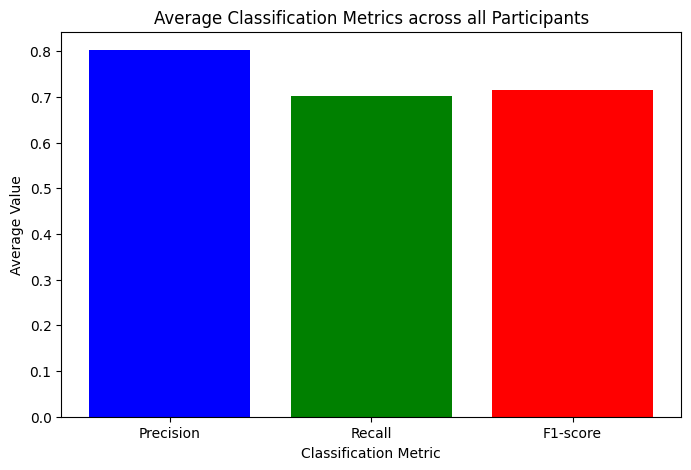

In [ ]:
import matplotlib.pyplot as plt

# Average classification metrics
metrics = ['Precision', 'Recall', 'F1-score']
avg_values = [avg_precision, avg_recall, avg_f1]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics, avg_values, color=['blue', 'green', 'red'])
plt.xlabel('Classification Metric')
plt.ylabel('Average Value')
plt.title('Average Classification Metrics across all Participants')
plt.show()


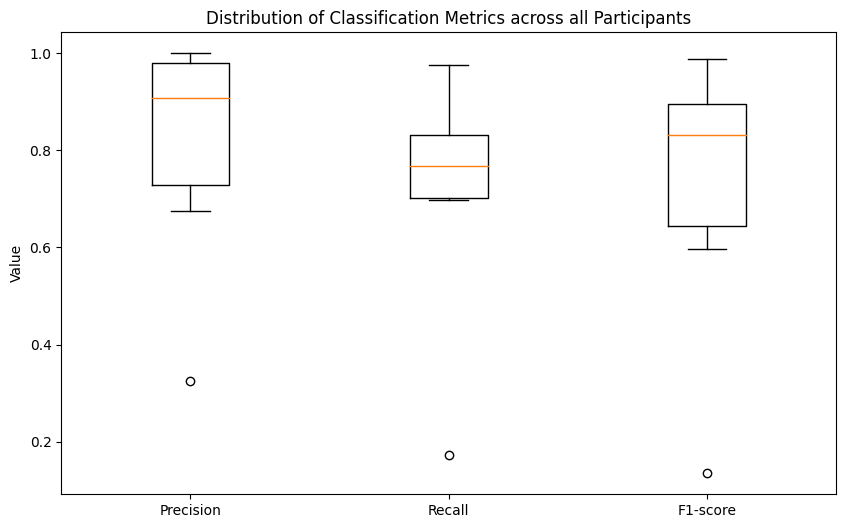

In [ ]:
# Classification metrics for all participants
all_precision = precision_list
all_recall = recall_list
all_f1 = f1_list

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot([all_precision, all_recall, all_f1], labels=['Precision', 'Recall', 'F1-score'])
plt.ylabel('Value')
plt.title('Distribution of Classification Metrics across all Participants')
plt.show()


create a small dataset where i have all participants data

In [ ]:
df_cleaned_ACC

,EDA,HR,TEMP,id,datetime,label,ACC
262144,9.957165,96.60,32.37,15,2020-07-24 13:22:31.781250048,2.0,3.666667
262145,9.957165,96.60,32.37,15,2020-07-24 13:22:31.812499968,2.0,1.000000
262146,9.957165,96.60,32.37,15,2020-07-24 13:22:31.843749888,2.0,0.333333
262147,9.957165,96.60,32.37,15,2020-07-24 13:22:31.875000064,2.0,-0.333333
262148,9.957165,96.60,32.37,15,2020-07-24 13:22:31.906249984,2.0,-2.666667
...,...,...,...,...,...,...,...
11509046,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.875000064,2.0,-16.000000
11509047,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.906249984,2.0,-10.333333
11509048,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.937499904,2.0,-12.000000
11509049,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.968750080,2.0,-9.333333


In [ ]:
# Drop the datetime column
df_cleaned_ACC.drop(columns=['datetime'], inplace=True)

# Display the resulting DataFrame
print(df_cleaned_ACC)


               EDA     HR   TEMP  id  label        ACC
262144    9.957165  96.60  32.37  15    2.0   3.666667
262145    9.957165  96.60  32.37  15    2.0   1.000000
262146    9.957165  96.60  32.37  15    2.0   0.333333
262147    9.957165  96.60  32.37  15    2.0  -0.333333
262148    9.957165  96.60  32.37  15    2.0  -2.666667
...            ...    ...    ...  ..    ...        ...
11509046  3.386070  88.37  33.77  F5    2.0 -16.000000
11509047  3.386070  88.37  33.77  F5    2.0 -10.333333
11509048  3.386070  88.37  33.77  F5    2.0 -12.000000
11509049  3.386070  88.37  33.77  F5    2.0  -9.333333
11509050  3.374543  88.33  33.75  F5    2.0  -5.666667

[8965481 rows x 6 columns]


In [ ]:
# Identify unique participants
participants = df_cleaned_ACC['id'].unique()

# Initialize empty DataFrame
participant_data = pd.DataFrame()

# Select the first 5000 rows and last 5000 rows for each participant and concatenate them
for participant in participants:
    participant_subset = df_cleaned_ACC[df_cleaned_ACC['id'] == participant]
    participant_first_500 = participant_subset.head(20000)
    participant_data = pd.concat([participant_data, participant_first_500])

# Reset index
participant_data.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(participant_data)


             EDA     HR   TEMP  id  label        ACC
0       9.957165  96.60  32.37  15    2.0   3.666667
1       9.957165  96.60  32.37  15    2.0   1.000000
2       9.957165  96.60  32.37  15    2.0   0.333333
3       9.957165  96.60  32.37  15    2.0  -0.333333
4       9.957165  96.60  32.37  15    2.0  -2.666667
...          ...    ...    ...  ..    ...        ...
299995  1.388562  96.35  32.39  F5    2.0 -25.333333
299996  1.388562  96.35  32.39  F5    2.0 -27.333333
299997  1.388562  96.35  32.39  F5    2.0 -27.666667
299998  1.388562  96.35  32.39  F5    2.0 -27.333333
299999  1.388562  96.35  32.39  F5    2.0 -28.333333

[300000 rows x 6 columns]


#RandomForest with K fold

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Encode the 'id' column into numeric values
label_encoder = LabelEncoder()
participant_data['id_encoded'] = label_encoder.fit_transform(participant_data['id'])

# Define features and target variable
X = participant_data.drop(columns=['label', 'id', 'id_encoded'])
y = participant_data['label']

# Define Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', rf_clf)  # Random Forest classifier
])

# Define hyperparameters for grid search
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__bootstrap': [True, False]
}

# Define class imbalance techniques and create pipeline
over_sampler = RandomOverSampler(random_state=42)
imb_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('over_sampler', over_sampler),  # Class imbalance technique
    ('clf', rf_clf)  # Random Forest classifier
])

# Use K-fold cross-validation for training and hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for train_idx, test_idx in kf.split(participant_data['id_encoded'].unique()):
    # Split data based on id
    train_id = participant_data['id_encoded'].unique()[train_idx]
    test_id = participant_data['id_encoded'].unique()[test_idx]

    # Filter data based on selected id(s)
    X_train = participant_data[participant_data['id_encoded'].isin(train_id)].drop(columns=['label', 'id', 'id_encoded'])
    y_train = participant_data[participant_data['id_encoded'].isin(train_id)]['label']
    X_test = participant_data[participant_data['id_encoded'].isin(test_id)].drop(columns=['label', 'id', 'id_encoded'])
    y_test = participant_data[participant_data['id_encoded'].isin(test_id)]['label']

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate the model's performance on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    #roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test), average='weighted', multi_class='ovr')

    # Append scores
    scores['accuracy'].append(accuracy)
    scores['precision'].append(precision)
    scores['recall'].append(recall)
    scores['f1'].append(f1)
    #scores['roc_auc'].append(roc_auc)

# Calculate mean scores
mean_scores = {k: sum(v) / len(v) for k, v in scores.items()}

# Output mean evaluation metrics
print("Mean Accuracy:", mean_scores['accuracy'])
print("Mean Precision:", mean_scores['precision'])
print("Mean Recall:", mean_scores['recall'])
print("Mean F1 Score:", mean_scores['f1'])
#print("Mean ROC AUC Score:", mean_scores['roc_auc'])

# Note: Replace 'your_data.csv' with the path to your actual dataset file.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Mean Accuracy: 0.7093333333333333
Mean Precision: 0.711111111111111
Mean Recall: 0.7093333333333333
Mean F1 Score: 0.6872340425531915


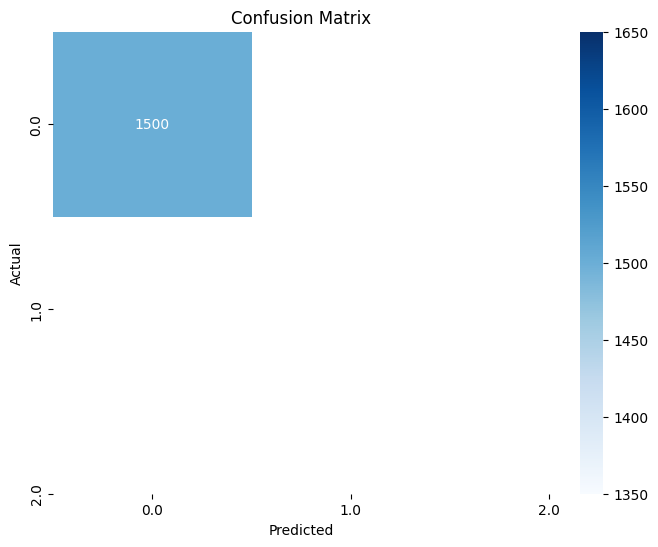

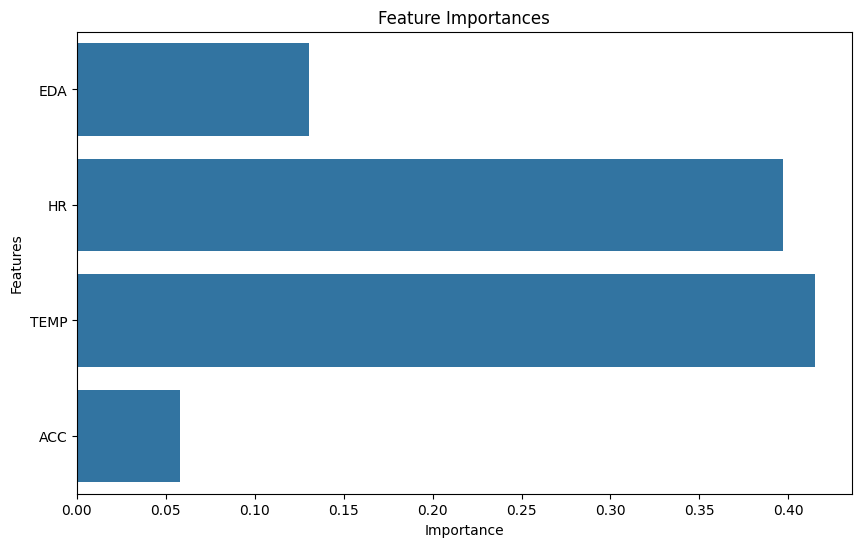

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get feature importances
feature_importances = grid_search.best_estimator_.named_steps['clf'].feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.svm import SVC

# Define Support Vector Machine classifier
svm_clf = SVC(random_state=42)

# Update pipeline with SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', svm_clf)  # SVM classifier
])

# Perform GridSearchCV for hyperparameter tuning
param_grid = {
    'clf__C': [0.1, 1, 10],  # Regularization parameter
    'clf__kernel': ['linear', 'rbf']  # Kernel type
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("SVM Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


SVM Evaluation Metrics:
Accuracy: 0.672
Precision: 1.0
Recall: 0.672
F1 Score: 0.8038277511961722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


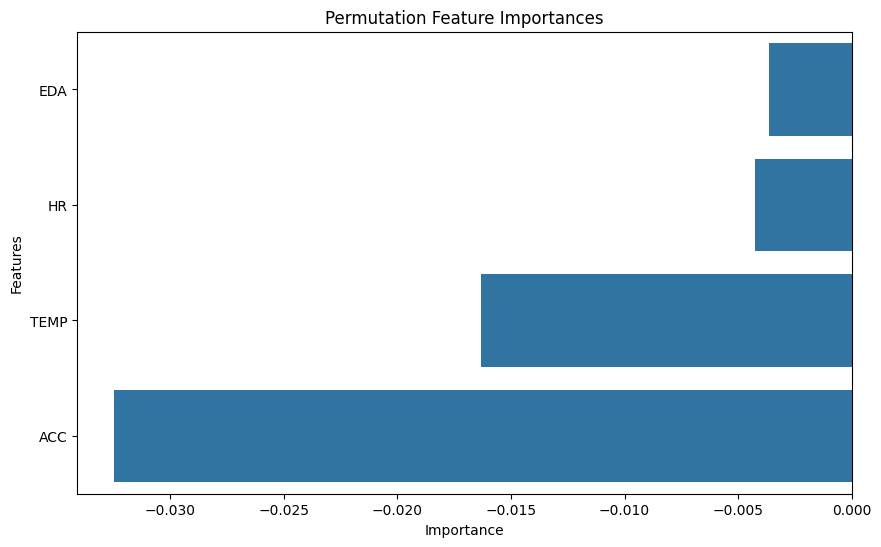

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importances
result = permutation_importance(grid_search, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances
importances = result.importances_mean

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Update pipeline with Gradient Boosting classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', gb_clf)  # Gradient Boosting classifier
])

# Define hyperparameters for grid search
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 4, 5],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Gradient Boosting Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Gradient Boosting Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


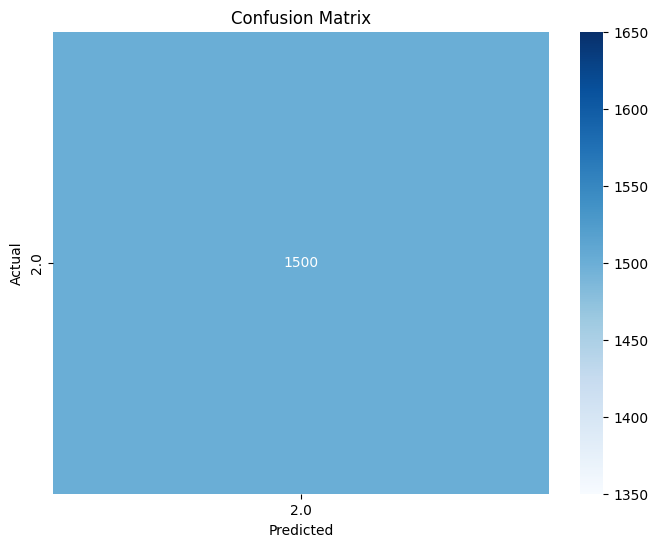

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
